
# **The Sparks Foundation- GRIPSEPT21**
### *Data Science & Business Analytics Internship*

**Done by : Mohammed Shamhan**

# **Task-2 Prediction Using Unsupervised ML**
**" From the given 'iris' dataset, predict the optimum number of clusters and represent it visually "**

# **K- Means Clustering**

### **Importing the libraries**

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### **Load the iris dataset**

In [188]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Data exploration**

In [173]:
data.shape

(150, 6)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [175]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [176]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [177]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### **Data visualization**

[]

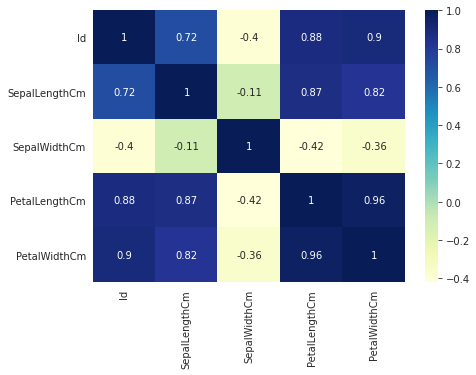

In [178]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.plot()

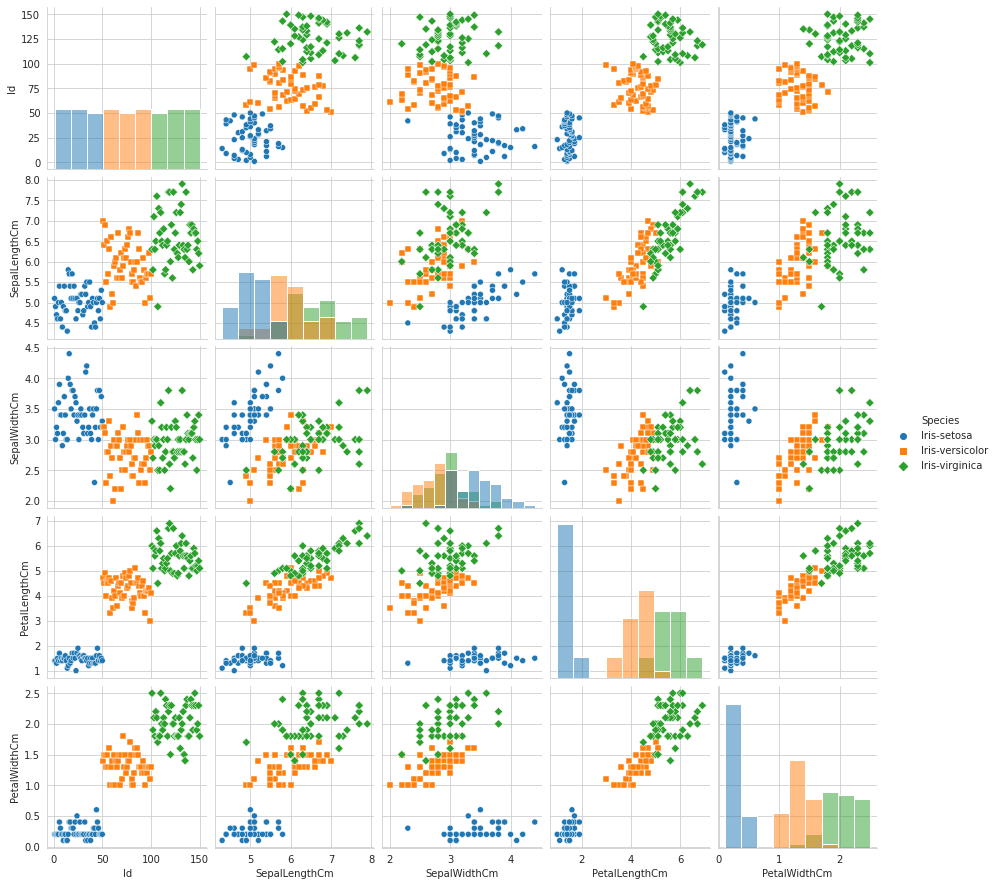

In [189]:
x_vars=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
y_vars=['Species']
sns.pairplot(data,diag_kind='hist',hue='Species',kind='scatter',markers=["o", "s", "D"])

### **Finding the optimal number of clusters for K-Means Classification and determining the value of K using the elbow method**

In [180]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

### **Plotting The Elbow Graph To Find Optimal Value Of 'k'**

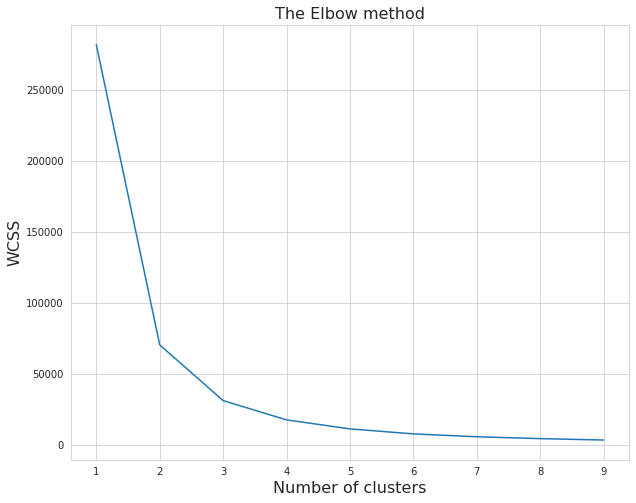

In [192]:
sns.set_style("whitegrid")
plt.plot(range(1, 10), wcss)
plt.title('The Elbow method',size=16)
plt.xlabel('Number of clusters',size=16)
plt.ylabel('WCSS',size=16) 
plt.show()

**The optimal number of clusters is given in the Elbow curve starts at '3'. In this case, the optimal number of clusters is k=3.**

### **K-means clustering with number of clusters = 3**

*Applying kmeans to the dataset / Creating the kmeans classifier*

In [182]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [183]:
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [184]:
pred_cluster=kmeans.fit_predict(x)

In [185]:
pred_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

###  **Visualising the clusters**

<function matplotlib.pyplot.show>

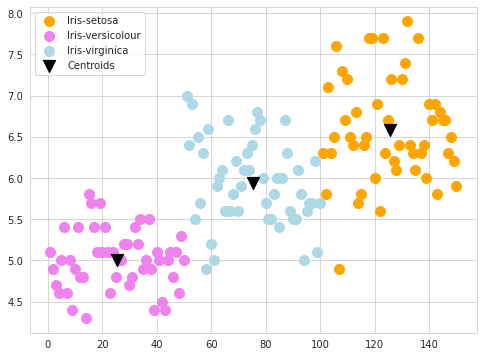

In [186]:
plt.figure(figsize=(8,6))
plt.scatter(x[pred_cluster==0,0],x[pred_cluster==0,1],s=100,c='orange',label='lris-setosa')
plt.scatter(x[pred_cluster==1,0],x[pred_cluster==1,1],s=100,c='violet',label='lris-versicolour')
plt.scatter(x[pred_cluster==2,0],x[pred_cluster==2,1],s=100,c='lightblue',label='lris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='black',label='Centroids',marker='v')
plt.legend()
plt.show

# **Thankyou**